# Configure the model architecture and training parameters

This tutorial provides a step-by-step guide on configuring the model architectures, training hyperparameters, and analysis of time-series single dataset using UNAGI. We demonstrate the capabilities of UNAGI by applying it to scRNA-seq data sampled from a single-nuclei RNA sequencing data.




In [1]:
import warnings
warnings.filterwarnings('ignore')
from UNAGI import UNAGI
unagi = UNAGI()

## Part 1: Setup and load the datasets

After loading UNAGI package, we need to setup the data for UNAGI training.

-   We need to specify the data path of your h5ad files after stage segmentation. e.g. '../data/small/0.h5ad'. Then UNAGI will load all h5ad files in the target directory. 

-   UNAGI requires the total number of time-points the dataset has as the input. e.g. total_stage=4

-   UNAGI requires the key of time-points attribute in the annData.obs table.

-   If the dataset is not splited into individual stages, you can specify the splited_dataset as False to segment the dataset.

-   To build the K-Nearest Neighbors (KNN) connectivity matrix in Graph convolution training, the neighbors number of KNN should be defined. The default value is 25. 

-   You can also specify how many threads you want to use when using UNAGI. The default number of threads is 20. 

In [2]:
unagi.setup_data('../UNAGI/data/example/0.h5ad',total_stage=4,stage_key='stage')

Fast mode enabled!
Cell graphs found, skipping cell graph construction!


## Part 2: Configure the model architecture of UNAGI and training hyper-parameters

First, it's mandatory to specify the **task** your are executing. (e.g. we call the example dataset as task='small_sample') The **task** is the identifier of your experiments and you can reterive the trained model and the results of each iteration at '../data/**task**/' directory. 

Next, you will need to specify the distribution of you single cell data. UNAGI provides negative binomial (NB), zero-inflated negative binomial (ZINB), zero-inflated log normal, and normal distribution to model your single cell data.

You can use the *device* keyword to specify the device you want to use for training.

'epoch_initial': the number of training epochs for the first iteration.

'epoch_iter': the number of training epochs for the iterative training.

'max_iter': the total number of iterations UNAGI will run

'BATCHSIZE': the batch size of a mini-batch

'lr': the learning rate of Graph VAE

'lr_dis': the learning rate of the adversarial discriminator

'latent_dim': the dimension of Z space

'hiddem_dim': the neuron size of each fully connected layers

'graph_dim': the dimension of graph representation

After settingt the training hyper parameters and model architectures, you can use `unagi.run_UNAGI()` to start training. 

Species: Running on Human data
...
0
vae_loss 2189.781328125
dis_loss 0.3720271623134613
adversarial_loss 2.570218869447708
[epoch 000]  average training loss: 2189.7813
CPO parameters are not set up, using default parameters
anchor_neighbors: 15, max_neighbors: 35, min_neighbors: 10, resolution_min: 0.8, resolution_max: 1.5
IDREM parameters are not set up, using default parameters
Minimum_Absolute_Log_Ratio_Expression: 0.5, Convergence_Likelihood: 0.001, Minimum_Standard_Deviation: 0.5
b''
[[[2], [0, 1], [0, 4], [14]], [[4], [2, 5], [2, 5], [1, 2, 8]], [[0], [3], [1, 3], [0, 4, 5, 6]], [[5], [4], [6], [9, 11]], [[9], [8], [7], [3, 13]], [[8], [9, 11], [8], [7]], [[10], [10], [9, 10], [10, 12]]]
['2', '0n1', '0n4', '14']
['4', '2n5', '2n5', '1n2n8']
['0', '3', '1n3', '0n4n5n6']
['5', '4', '6', '9n11']
['9', '8', '7', '3n13']
['8', '9n11', '8', '7']
['10', '10', '9n10', '10n12']
['10-10-9n10-10n12.txt', '2-0n1-0n4-14.txt', '8-9n11-8-7.txt', '0-3-1n3-0n4n5n6.txt', '4-2n5-2n5-1n2n8.txt', 

rm: cannot remove '../UNAGI/data/example/0/idremResults': No such file or directory


getting TFs from  0-3-1n3-0n4n5n6.txt_viz
getting TFs from  4-2n5-2n5-1n2n8.txt_viz
getting TFs from  5-4-6-9n11.txt_viz
getting TFs from  8-9n11-8-7.txt_viz
getting TFs from  10-10-9n10-10n12.txt_viz
getting TFs from  2-0n1-0n4-14.txt_viz
getting Target genes from  9-8-7-3n13.txt_viz
getting Target genes from  0-3-1n3-0n4n5n6.txt_viz
getting Target genes from  4-2n5-2n5-1n2n8.txt_viz
getting Target genes from  5-4-6-9n11.txt_viz
getting Target genes from  8-9n11-8-7.txt_viz
getting Target genes from  10-10-9n10-10n12.txt_viz
getting Target genes from  2-0n1-0n4-14.txt_viz
Species: Running on Human data
...
load last iteration model.....
0
vae_loss 1876.9217377272776
dis_loss 0.08653090674430132
adversarial_loss 3.806895890235901
[epoch 000]  average training loss: 1876.9217
1
vae_loss 1819.3193264005286
dis_loss 0.02922757076099515
adversarial_loss 4.971958065032959
[epoch 001]  average training loss: 1819.3193
2
vae_loss 1783.3732896858555
dis_loss 0.00888162679504603
adversarial_los

rm: cannot remove '../UNAGI/data/example/1/idremResults': No such file or directory


IDREM results for 14-15-15-16.txt_viz are checked
checking IDREM results for  3-6-6-7.txt_viz
getting Target genes from  3-6-6-7.txt_viz
IDREM results for 3-6-6-7.txt_viz are checked
checking IDREM results for  8-7n13-8n11-2n10.txt_viz
getting Target genes from  8-7n13-8n11-2n10.txt_viz
IDREM results for 8-7n13-8n11-2n10.txt_viz are checked
checking IDREM results for  0-1-0n10-9.txt_viz
getting Target genes from  0-1-0n10-9.txt_viz
IDREM results for 0-1-0n10-9.txt_viz are checked
idrem Done
getting TFs from  8-7n13-8n11-2n10.txt_viz
getting TFs from  14-15-15-16.txt_viz
getting TFs from  3-6-6-7.txt_viz
getting TFs from  4-8n16-7-4n5.txt_viz
getting TFs from  10-14-4-3n13n15.txt_viz
getting TFs from  2-3n5n10-1n3n12-0n1n14.txt_viz
getting TFs from  12-2n11-5n16-11.txt_viz
getting TFs from  13-9-13n14-12n17.txt_viz
getting TFs from  0-1-0n10-9.txt_viz
getting TFs from  9-12-9-8.txt_viz
getting TFs from  1-0-2-6.txt_viz
getting Target genes from  8-7n13-8n11-2n10.txt_viz
getting Target g

rm: cannot remove '../UNAGI/data/example/2/idremResults': No such file or directory


IDREM results for 0-0n14-1-8.txt_viz are checked
checking IDREM results for  2-5-6-4.txt_viz
getting Target genes from  2-5-6-4.txt_viz
IDREM results for 2-5-6-4.txt_viz are checked
checking IDREM results for  8-6-5n13-0.txt_viz
getting Target genes from  8-6-5n13-0.txt_viz
IDREM results for 8-6-5n13-0.txt_viz are checked
checking IDREM results for  15-9n15-2-6n13n15.txt_viz
getting Target genes from  15-9n15-2-6n13n15.txt_viz
IDREM results for 15-9n15-2-6n13n15.txt_viz are checked
idrem Done
getting TFs from  13-4-8-3n5.txt_viz
getting TFs from  1-3-3n12-1n17.txt_viz
getting TFs from  4-8-11n14-9.txt_viz
getting TFs from  15-9n15-2-6n13n15.txt_viz
getting TFs from  3-2n10-4n16-12.txt_viz
getting TFs from  16-13-10-11n16.txt_viz
getting TFs from  0-0n14-1-8.txt_viz
getting TFs from  8-6-5n13-0.txt_viz
getting TFs from  5-7n11-0-2n7.txt_viz
getting TFs from  2-5-6-4.txt_viz
getting TFs from  17-16-15-14.txt_viz
getting TFs from  9-12-9-10.txt_viz
getting Target genes from  13-4-8-3n5.tx

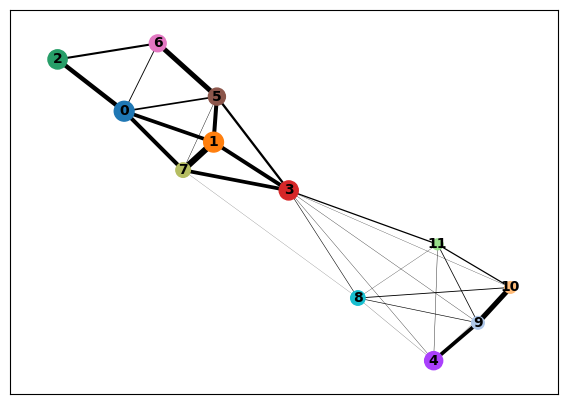

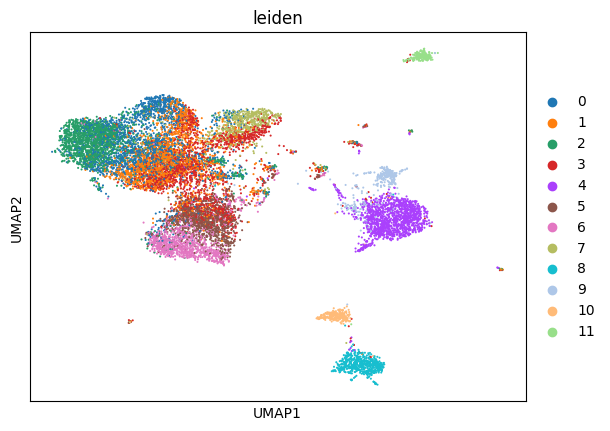

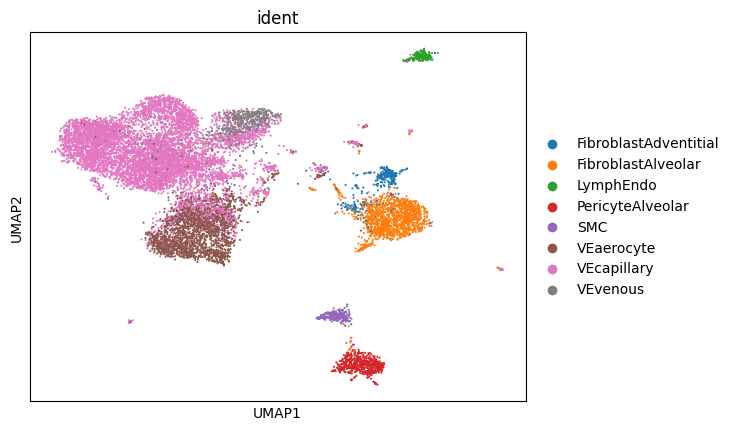

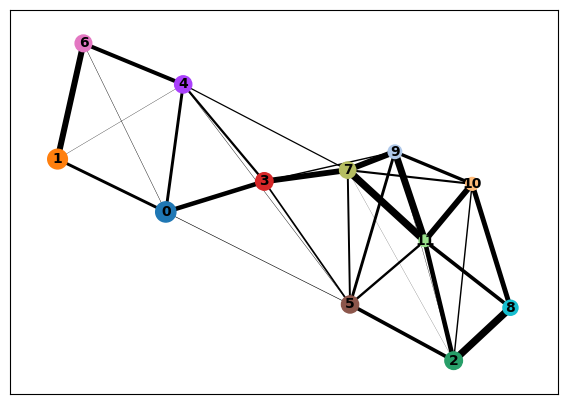

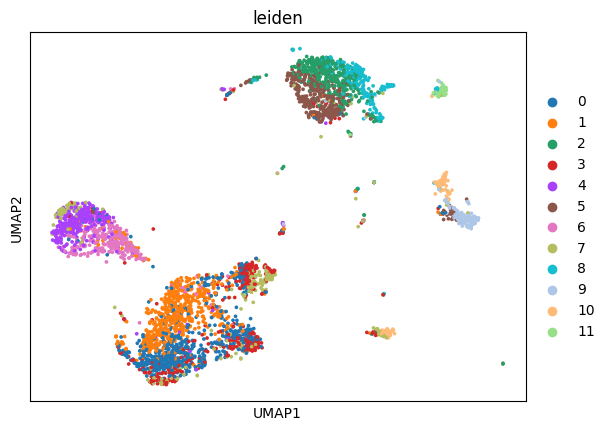

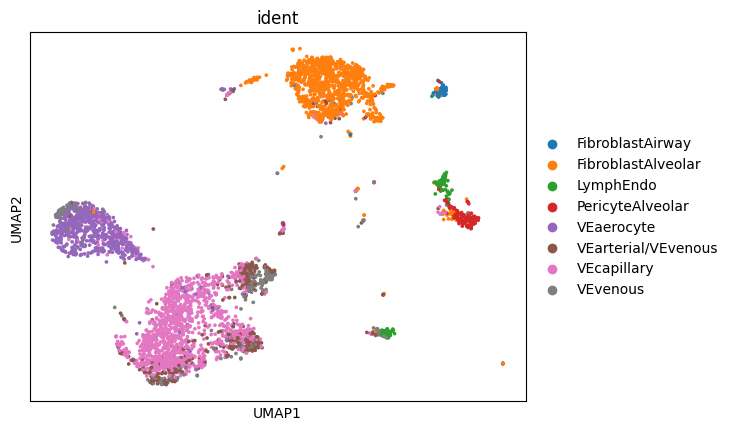

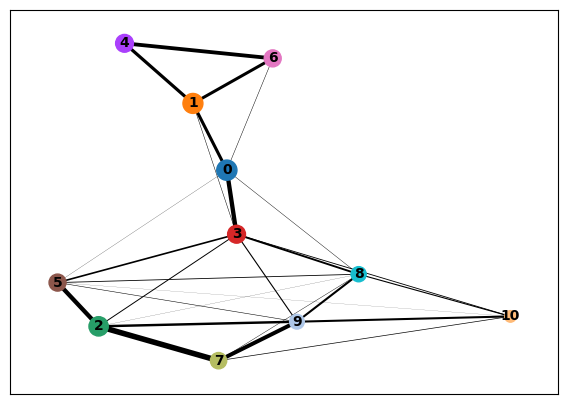

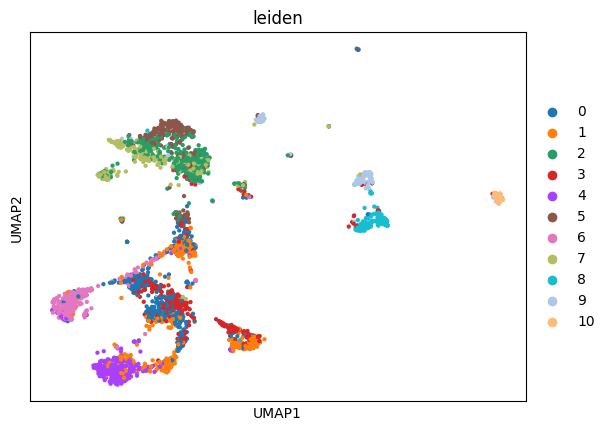

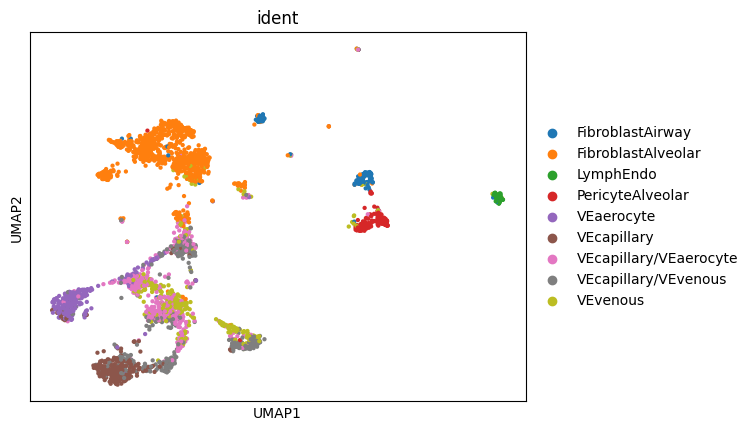

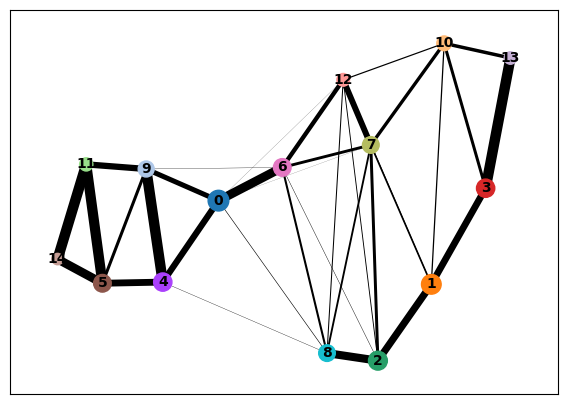

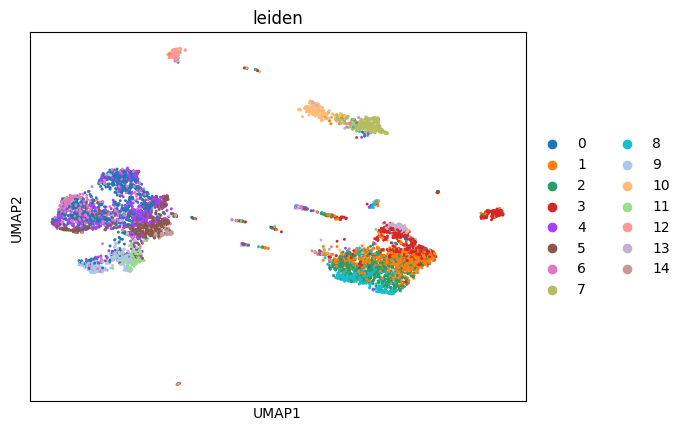

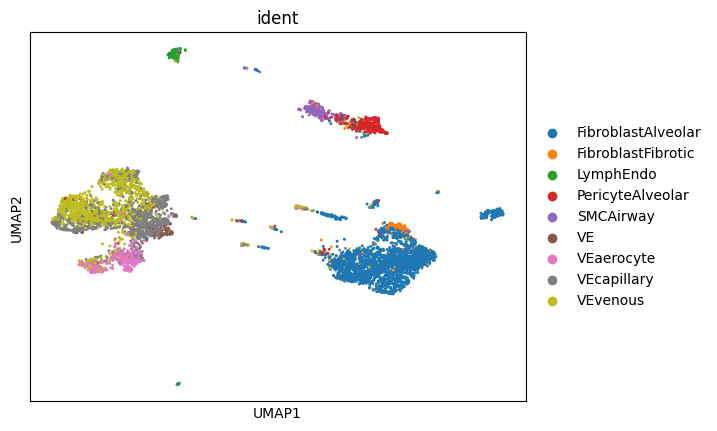

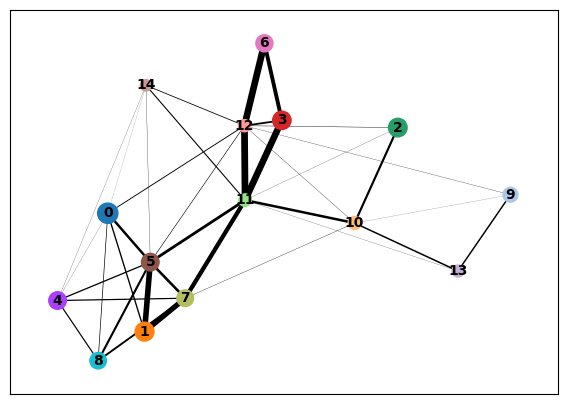

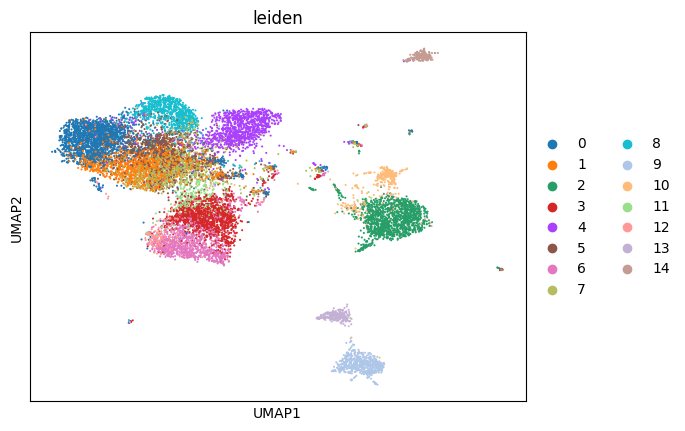

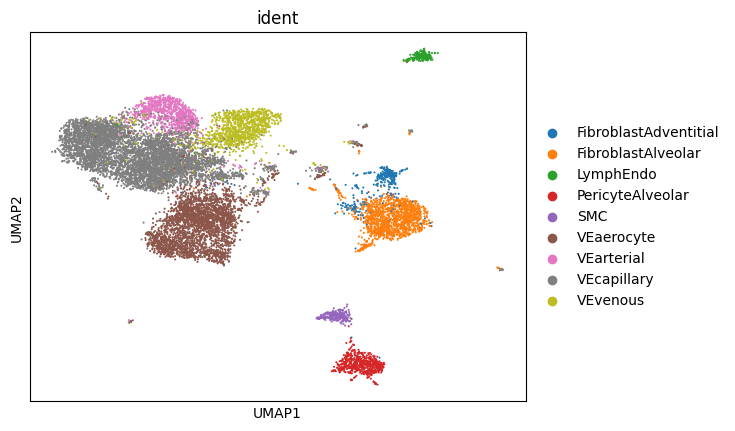

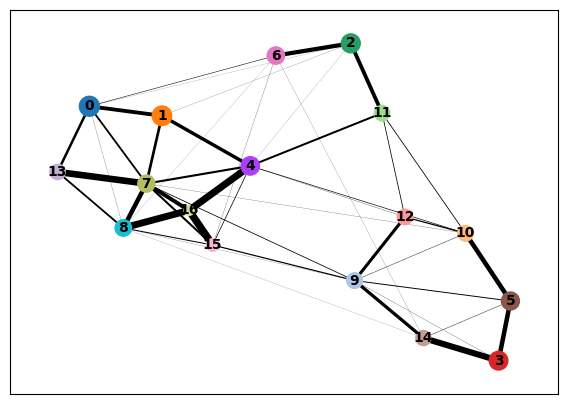

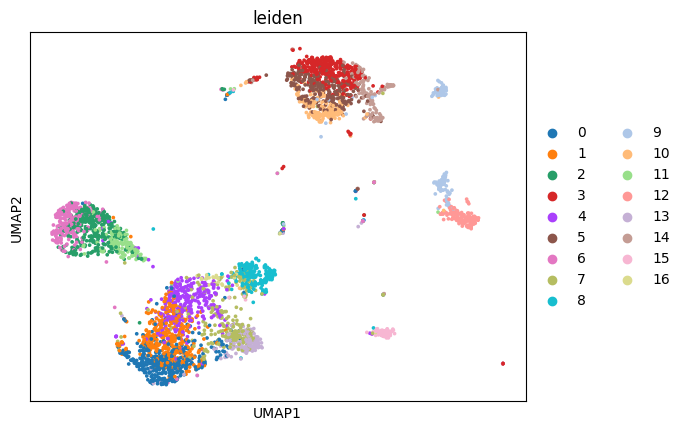

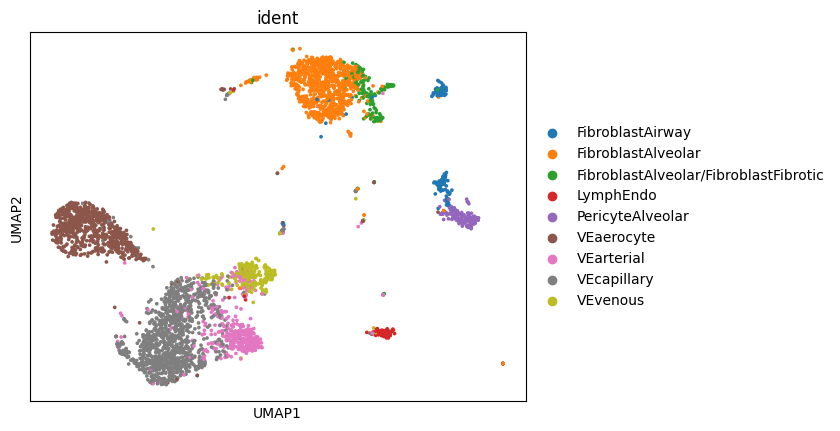

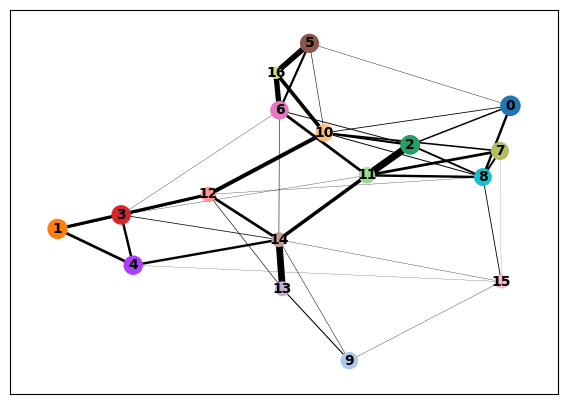

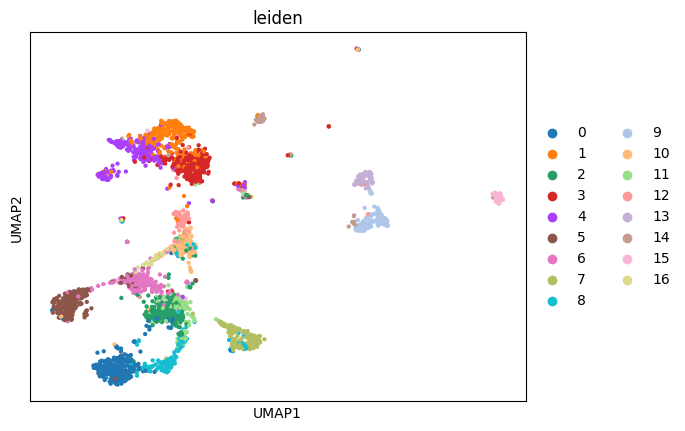

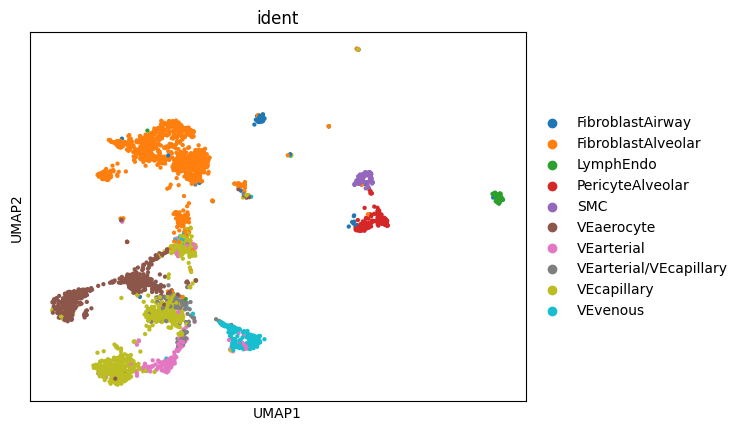

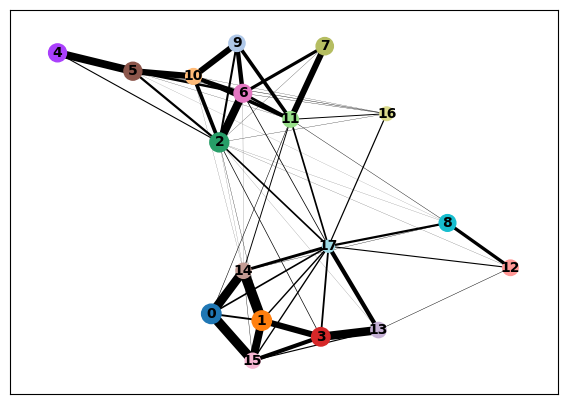

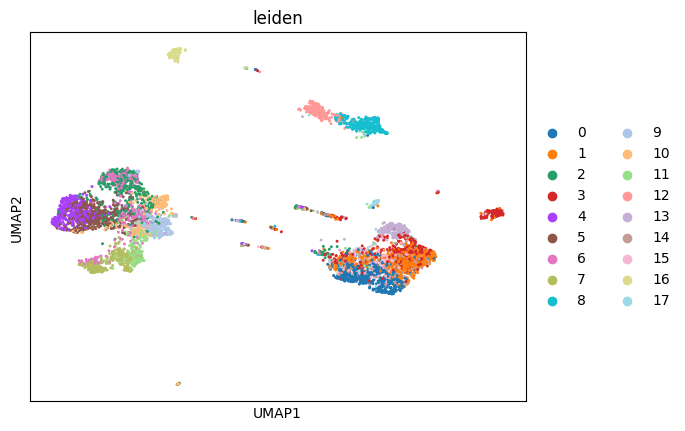

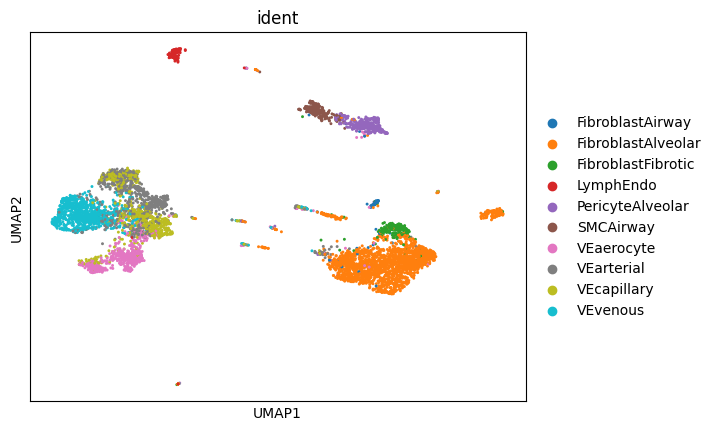

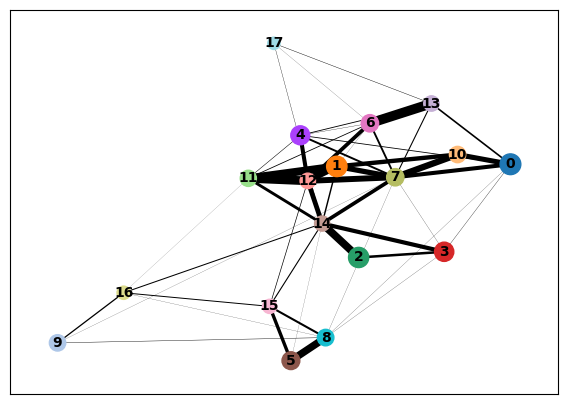

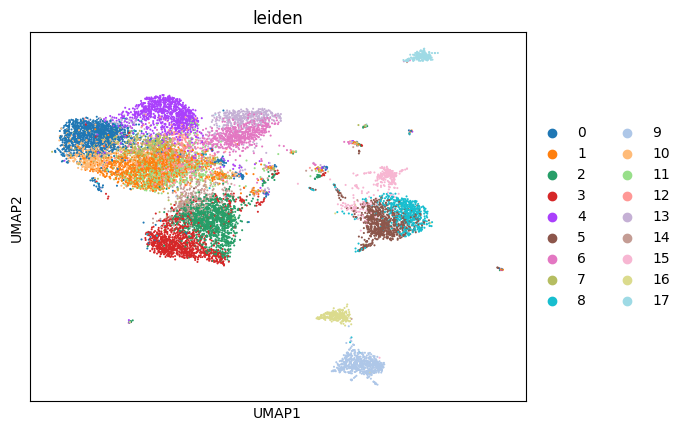

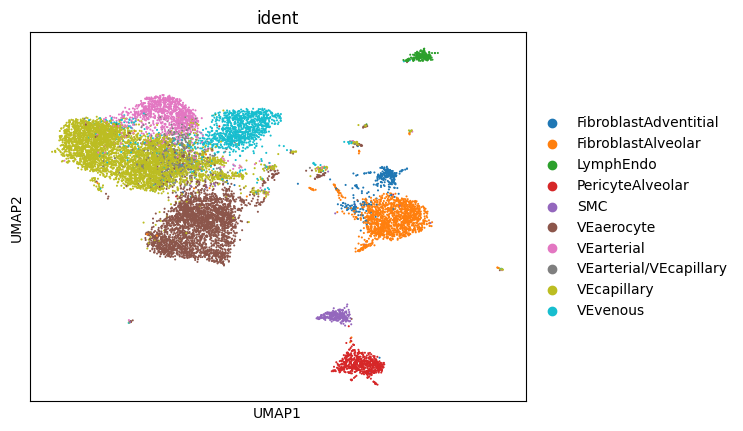

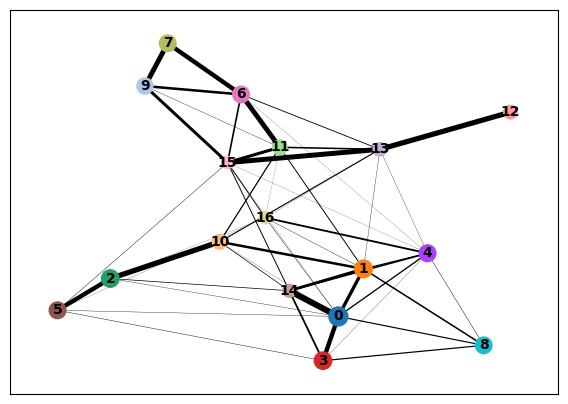

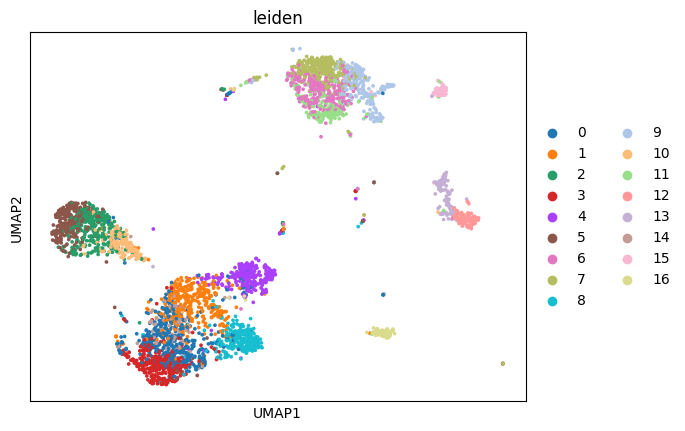

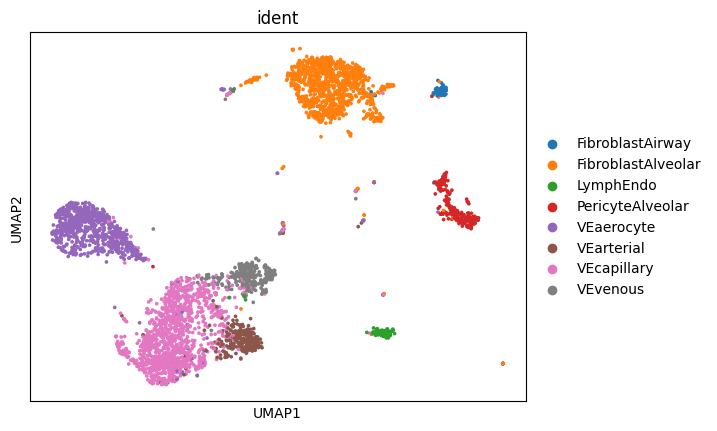

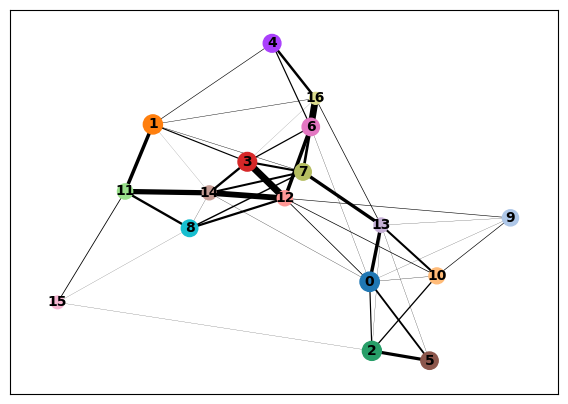

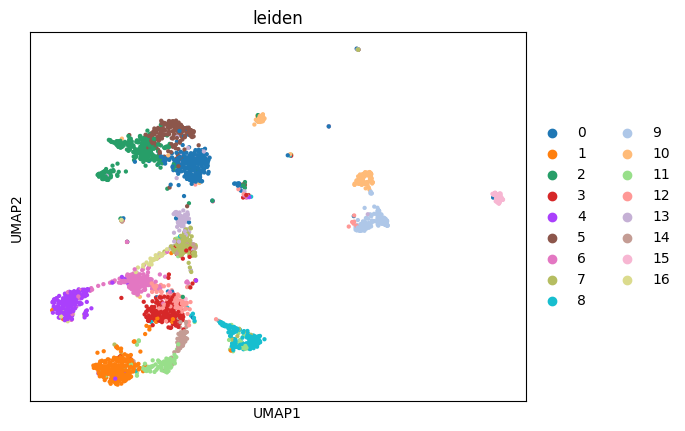

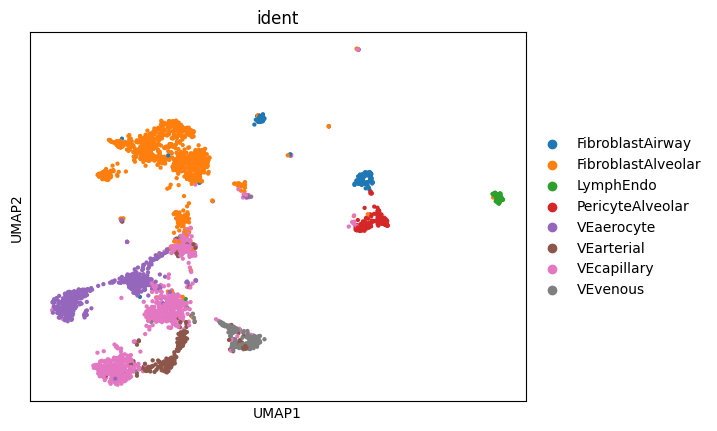

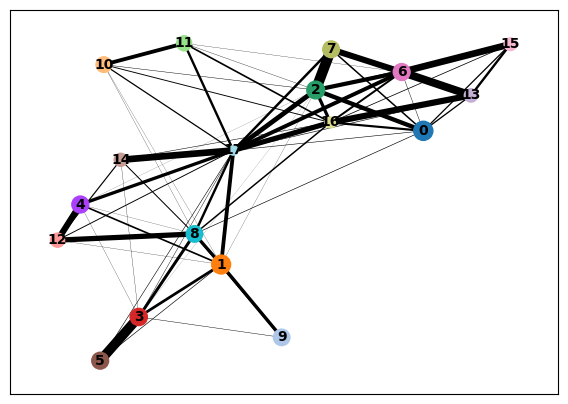

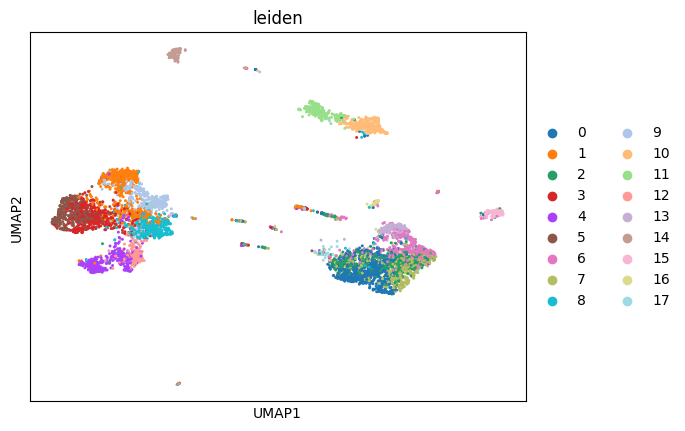

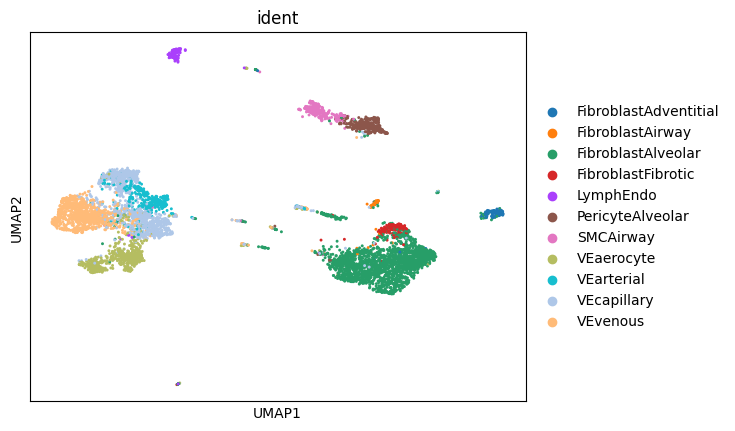

In [ ]:
unagi.setup_training(task='example',dist='ziln',device='cuda:0',GPU=True,epoch_iter=5,\
                    epoch_initial=1,max_iter=3,BATCHSIZE=560)
unagi.run_UNAGI(idrem_dir = '../idrem')

## Part 3: Perform in-silico perturbations and downstream analysis

After training the UNAGI model, you can perfrom downstream tasks including hierarchical static marker discovries 
parameters: 
data_path: the directory of the dataset generated by UNAGI
iteration: the iteration of the dataset belongs to
progressionmarker_background_sampling_times: the number of sampling times to generate the dynamic marker backgrounds
target_dir: the directory to store the downstream analysis results and h5ad files
customized_drug: the directory to customized drug profile
cmap_dir: the directory to the precomputed CMAP database which contains the drug/compounds and their regualted genes and regualated directions.
**NOTE**: Please download `cmap_drug_target.npy` and `cmap_direction_df.npy` from [here](https://zenodo.org/records/15692608).

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from UNAGI import UNAGI
unagi = UNAGI()
unagi.analyse_UNAGI('../UNAGI/data/example/2/stagedata/dataset.h5ad',iteration=2,random_background_sampling_times=1000,
                target_dir=None,customized_drug='../UNAGI/data/cmap_drug_target_genes.npy',run_perturbation=True)

AnnData object with n_obs × n_vars = 27647 × 2484
    obs: 'barcode', 'nUMI', 'nGene', 'percMito', 'percSpliced.v', 'percUnspliced.v', 'percAmbiguous.v', 'Sample.ID', 'Subject.ID', 'Sex', 'Age', 'Surface.Density', 'Percent.Tissue', 'Disease.Ident', 'nCount_RNA', 'final.ident', 'nFeature_RNA', 'nCount_integrated', 'nFeature_integrated', 'name.simple', 'Library.Ident', 'renamedFin', 'integrated_snn_res.2', 'seurat_clusters', 'renamed.2', 'integrated_snn_res.3', 'log10UMI', 'renamed.3', 'stage', 'leiden', 'ident'
    var: 'features'
    uns: 'clusterType', 'edges', 'topGene', 'top_gene_fold_change', 'top_gene_pvals_adj'
    obsm: 'X_umap', 'umap', 'z'
    layers: 'geneWeight'
    obsp: 'gcn_connectivities'
calculate hierarchical markers.....
hierarchical static markers done
calculateDataPathwayOverlapGene done
calculateTopPathwayGeneRanking done
getting Target genes from  13-4-8-3n5.txt_viz
getting Target genes from  1-3-3n12-1n17.txt_viz
getting Target genes from  4-8-11n14-9.txt_viz
get

100%|██████████| 1856/1856 [20:28<00:00,  1.51it/s]


finished


100%|██████████| 1856/1856 [20:41<00:00,  1.50it/s]


finished
score weight: 10


100%|██████████| 238/238 [02:39<00:00,  1.49it/s]


finished
drug perturabtion done


  5%|▍         | 11/238 [00:07<02:32,  1.49it/s]


Random drug background perturbation stopped as reaching the set random times: 10


  5%|▍         | 11/238 [00:07<02:31,  1.50it/s]


Random drug background perturbation stopped as reaching the set random times: 10
score weight: 100
analysis of drug perturbation
The analysis has been done, please check the outputs!


# Part 4: Visualize the outcomes of UNAGI model

UNAGI will create a new folder containing a `.h5ad` file, a `.pkl` file and other files to help visualize the outcomes. Use the following scripts to load and visualize the UNAGI outcomes.

### Load `.h5ad` and `.pkl` file

In [1]:
import scanpy as sc
import pickle as pkl
adata = sc.read('./example_2/dataset.h5ad')
adata.uns = pkl.load(open('./example_2/attribute.pkl', 'rb'))

### Visualize cell embeddings and cell type composition acorss stages

/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/plotting/plot_cell_embeddings.py:117: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  0.6498685953331746
NMIs:  0.6561472384855656
silhouette score:  0.21593466732718553


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/plotting/plot_cell_embeddings.py:117: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  0.668555483034507
NMIs:  0.7187428541512173
silhouette score:  0.296324791892683


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/plotting/plot_cell_embeddings.py:117: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  0.742914172570413
NMIs:  0.7742452109209056
silhouette score:  0.21248575500428143


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/plotting/plot_cell_embeddings.py:117: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['UNAGI'] = adata.obs[cell_type_key].astype('category')


ARI:  0.7588701666026652
NMIs:  0.7533731402998234
silhouette score:  0.22446716375582107


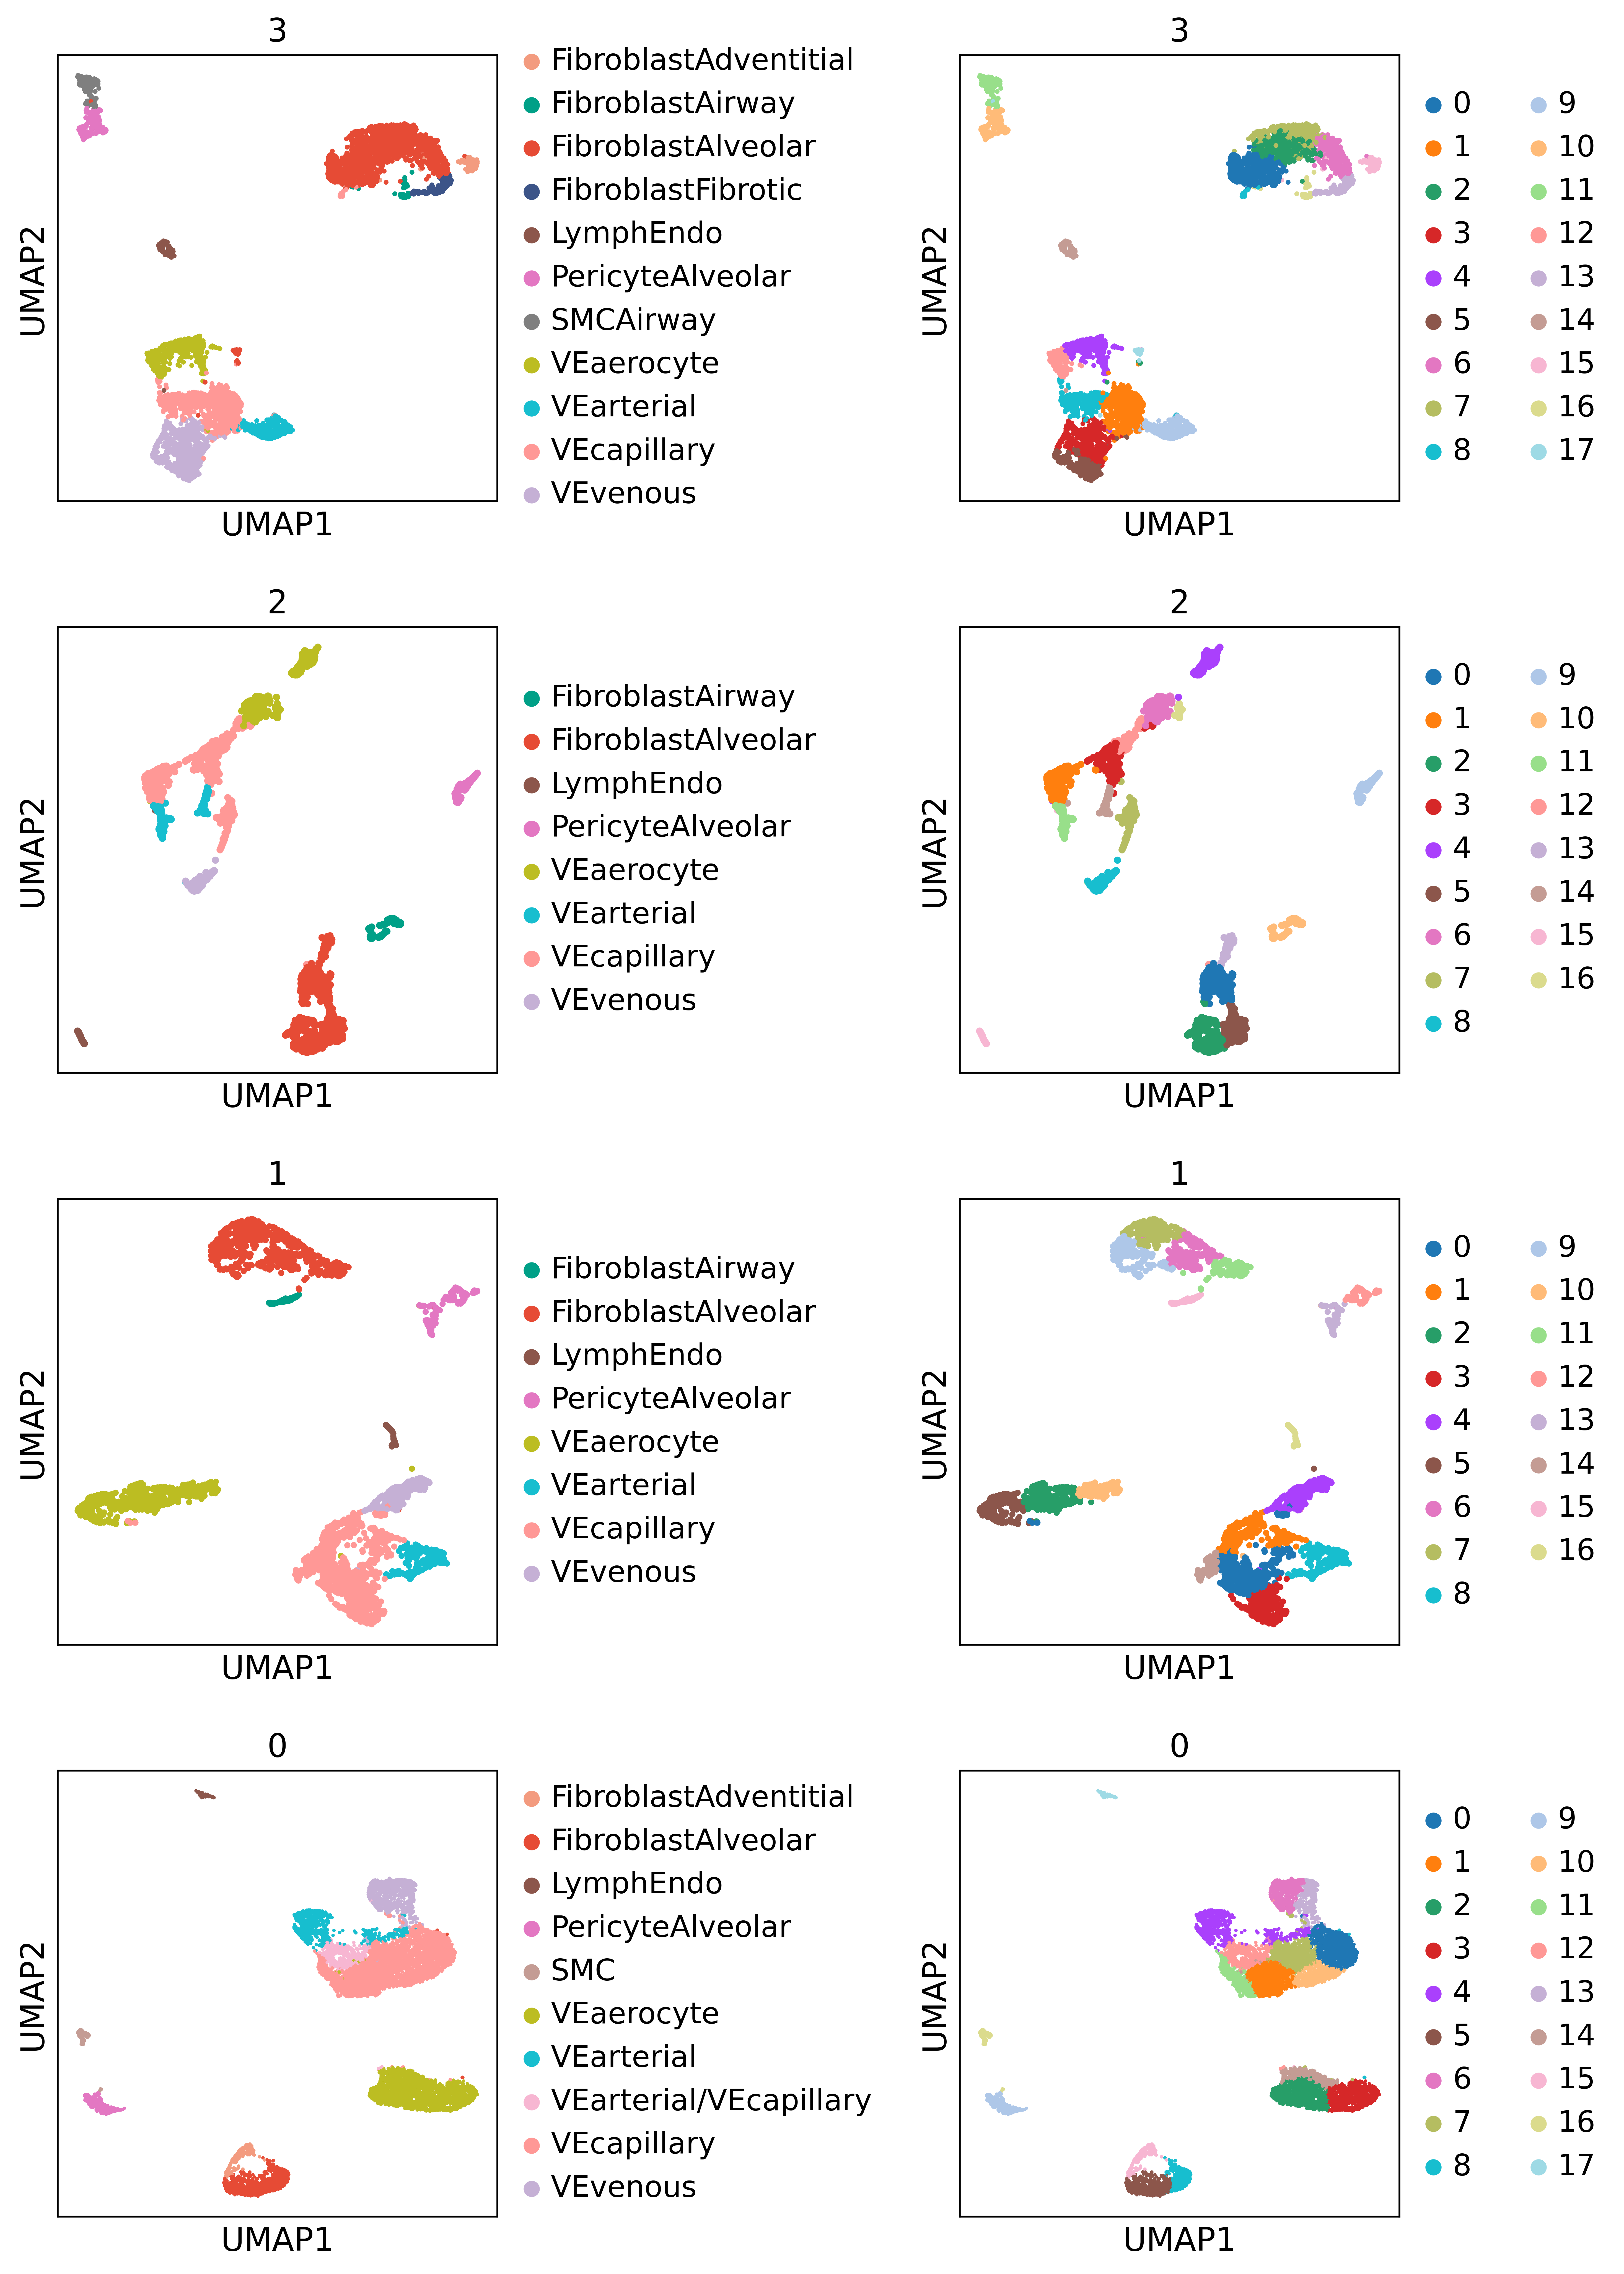

ARIs:  [0.7050521043851898]
NMI:  [0.7256271109643779]
silhouette score:  0.2373030944949928


In [2]:
from UNAGI.plotting import cell_type_composition, plot_stages_latent_representation
plot_stages_latent_representation(adata, cell_type_key='ident', stage_key='stage')

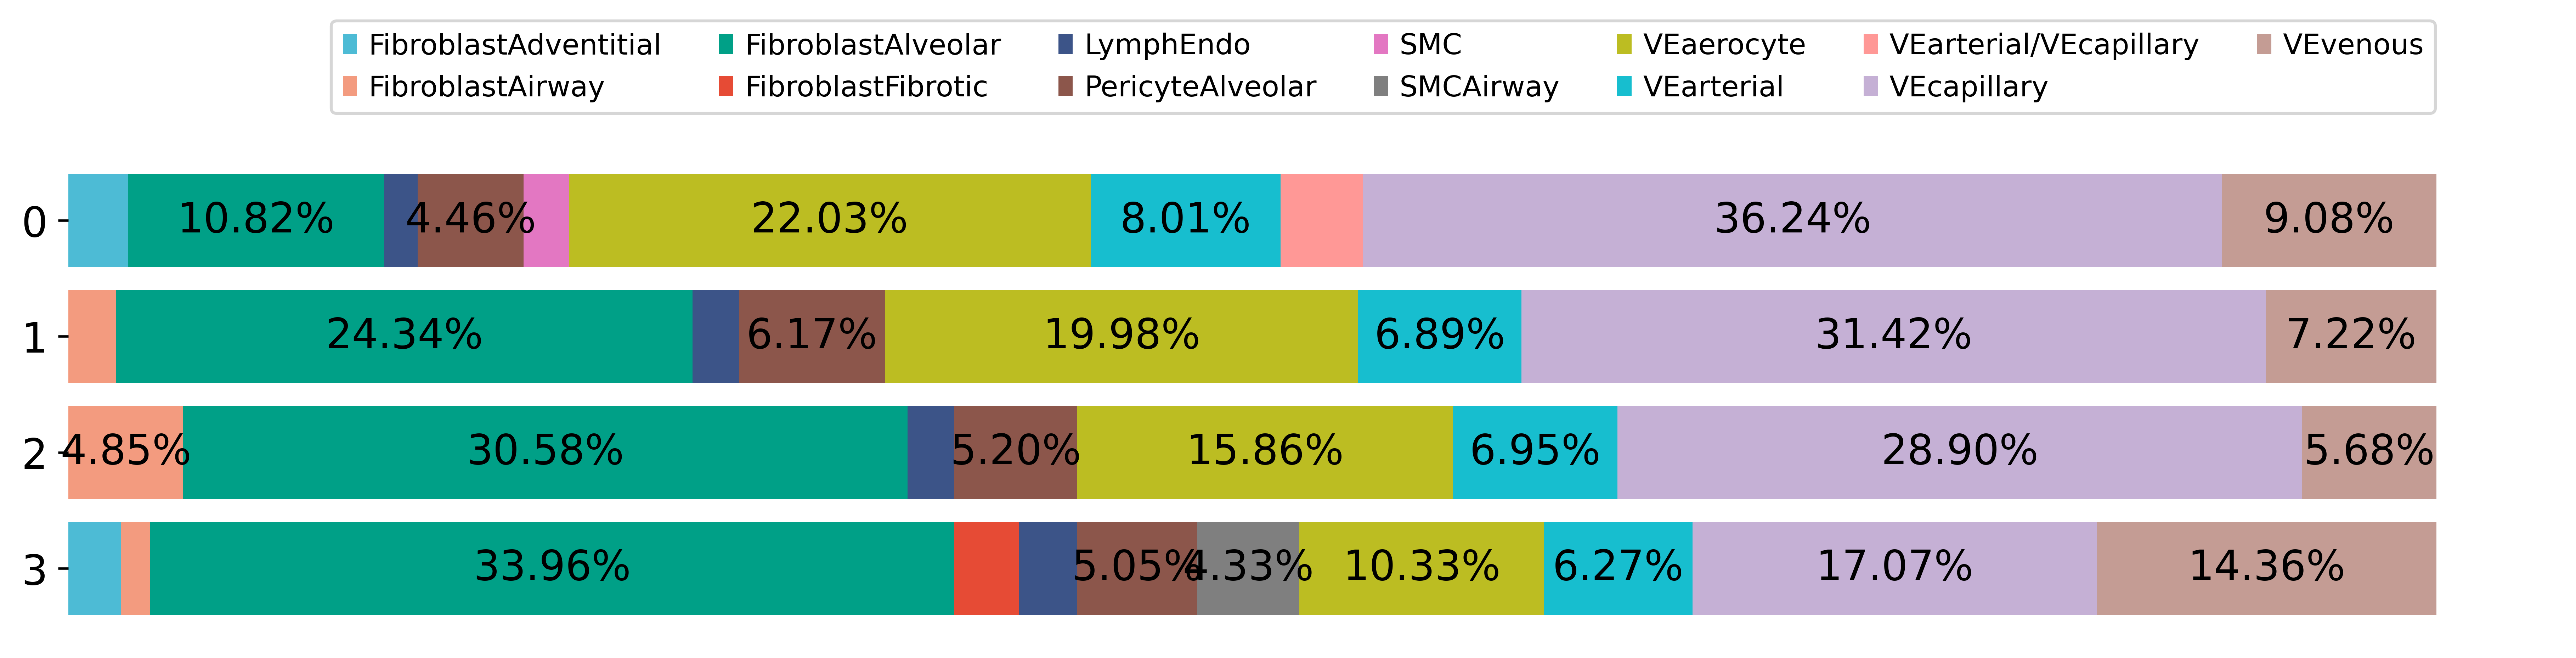

In [3]:
cell_type_composition(adata, cell_type_key='ident', stage_key='stage')

### Visualize temporal dynamic graphs by text

In [5]:
from UNAGI.utils import visualize_dynamic_graphs_by_text
visualize_dynamic_graphs_by_text(edges=adata.uns['edges'],cell_types=adata.uns['clusterType'])

# to save the dynamic graphs to a text file, use the following line instead
# visualize_dynamic_graphs_by_text(edges=adata.uns['edges'],cell_types=adata.uns['clusterType'],write='saved_dynamic_graphs.txt')

Track 0 :
Stage 0|-- 0_VEcapillary
    Stage 1|-- 0_VEcapillary
    Stage 1|-- 14_VEcapillary
        Stage 2|-- 1_VEcapillary
            Stage 3|-- 8_VEcapillary
Track 7 :
Stage 0|-- 7_VEcapillary
    Stage 1|-- 1_VEcapillary
        Stage 2|-- 7_VEcapillary
Track 3 :
Stage 0|-- 3_VEaerocyte
    Stage 1|-- 2_VEaerocyte
        Stage 2|-- 4_VEaerocyte
            Stage 3|-- 12_VEaerocyte
        Stage 2|-- 16_VEaerocyte
    Stage 1|-- 10_VEaerocyte
Track 1 :
Stage 0|-- 1_VEcapillary
    Stage 1|-- 3_VEcapillary
        Stage 2|-- 3_VEcapillary
            Stage 3|-- 1_VEcapillary
        Stage 2|-- 12_VEcapillary
            Stage 3|-- 17_FibroblastAlveolar
Track 13 :
Stage 0|-- 13_VEvenous
    Stage 1|-- 4_VEvenous
        Stage 2|-- 8_VEvenous
            Stage 3|-- 3_VEvenous
            Stage 3|-- 5_VEvenous
Track 2 :
Stage 0|-- 2_VEaerocyte
    Stage 1|-- 5_VEaerocyte
        Stage 2|-- 6_VEaerocyte
            Stage 3|-- 4_VEaerocyte
Track 8 :
Stage 0|-- 8_FibroblastAlveolar
   

### Visualize overall durg perturbation results

In [ ]:
from UNAGI.perturbations import get_top_compounds, get_top_pathways
get_top_compounds(adata,perturb_change=0.5,top_n=10)

compound  perturbation score  \
0                                          ibudilast            0.437370   
1  doxofylline,roflumilast,cilomilast,Ro-20-1724,...            0.394073   
2                     dyphylline,rolipram,apremilast            0.394073   
3                                         canertinib            0.383658   
4                                         vandetanib            0.378003   
5                                         nimodipine            0.371916   
6                                         felodipine            0.371916   
7                                        regorafenib            0.341951   
9                              amlodipine,nifedipine            0.339045   
8                  verapamil,isradipine,nitrendipine            0.339045   

   pval_adjusted                                drug_regulation  \
0   1.515492e-10                   [PDE10A:-, PDE3A:-, PDE4D:+]   
1   2.137931e-08                                      [PDE4D:+]   
2   2.137931e-08                                      [PDE4D:-]   
3   6.380332e-08                              [EGFR:+, ERBB4:-]   
4   1.137143e-07                 [EGFR:-, FLT1:-, KDR:+, TEK:+]   
5   2.092155e-07                [NR3C2:-, CACNA1C:+, CACNA1D:+]   
6   2.092155e-07                [NR3C2:+, CACNA1C:-, CACNA1D:-]   
7   3.492143e-06  [FGFR2:+, FLT1:+, FRK:+, KDR:+, KIT:+, TEK:+]   
9   4.513362e-06                         [CACNA1C:+, CACNA1D:+]   
8   4.513362e-06                         [CACNA1C:-, CACNA1D:-]   

                                idrem_suggestion  
0                   [PDE10A:-, PDE3A:-, PDE4D:+]  
1                                      [PDE4D:+]  
2                                      [PDE4D:+]  
3                              [EGFR:-, ERBB4:-]  
4                 [EGFR:-, FLT1:+, KDR:+, TEK:+]  
5                [NR3C2:+, CACNA1C:-, CACNA1D:+]  
6                [NR3C2:+, CACNA1C:-, CACNA1D:+]  
7  [FGFR2:-, FLT1:+, FRK:-, KDR:+, KIT:-, TEK:+]  
9                         [CACNA1C:-, CACNA1D:+]  
8                         [CACNA1C:-, CACNA1D:+]

### Visualize pathway perturbation results

In [ ]:
get_top_pathways(adata,perturb_change=0.5,top_n=10)

pathways  perturbation score  \
0                                    NABA_MATRISOME            0.408934   
1               REACTOME_NERVOUS_SYSTEM_DEVELOPMENT            0.359803   
2                         NABA_MATRISOME_ASSOCIATED            0.356700   
3                    REACTOME_DEVELOPMENTAL_BIOLOGY            0.351248   
4                      WP_PI3KAKT_SIGNALING_PATHWAY            0.350799   
5                        REACTOME_SIGNALING_BY_GPCR            0.339109   
6    WP_FOCAL_ADHESION_PI3KAKTMTORSIGNALING_PATHWAY            0.338154   
7  REACTOME_POST_TRANSLATIONAL_PROTEIN_MODIFICATION            0.327522   
8                               NABA_CORE_MATRISOME            0.322995   
9                                 WP_FOCAL_ADHESION            0.322200   

   pval_adjusted                                    regulated genes  \
0   4.329870e-15  [ABI3BP, BMPER, CILP, COMP, CRIM1, CRISPLD1, C...   
1   1.046807e-11  [CNTN1, EPHA3, NTN1, PRKCQ, NTN4, SEMA3A, PAK3...   
2   1.650835e-11  [ANXA1, ANXA13, ANXA2, ANXA3, ANXA4, C1QTNF8, ...   
3   3.635869e-11  [SPAG9, MAMLD1, CNTN1, EPHA3, NTN1, PRKCQ, FGF...   
4   3.878020e-11  [GNGT1, BCL2L1, VWF, INSR, LPAR1, MDM2, FLT1, ...   
5   2.009347e-10  [CX3CL1, CASR, PTGER3, NPFFR2, CAMK2B, DGKG, C...   
6   2.292266e-10  [GNGT1, PPARGC1A, NOS1, VWF, INSR, LPAR1, MDM2...   
7   9.652306e-10  [CFTR, KLHL13, THSD7A, ASB4, PLAUR, BIRC3, VCA...   
8   1.752863e-09  [ABI3BP, BMPER, CILP, COMP, CRIM1, CRISPLD1, C...   
9   1.944566e-09  [SHC4, VWF, FLT1, ITGA6, KDR, ITGA1, ITGA2, FN...   

                                    idrem_suggestion  
0  [ABI3BP:+, BMPER:+, CILP:-, COMP:-, CRIM1:-, C...  
1  [CNTN1:-, EPHA3:-, NTN1:-, PRKCQ:-, NTN4:+, SE...  
2  [ANXA1:-, ANXA13:-, ANXA2:-, ANXA3:+, ANXA4:-,...  
3  [SPAG9:+, MAMLD1:-, CNTN1:-, EPHA3:-, NTN1:-, ...  
4  [GNGT1:-, BCL2L1:-, VWF:+, INSR:-, LPAR1:-, MD...  
5  [CX3CL1:-, CASR:-, PTGER3:-, NPFFR2:+, CAMK2B:...  
6  [GNGT1:-, PPARGC1A:-, NOS1:+, VWF:+, INSR:-, L...  
7  [CFTR:-, KLHL13:-, THSD7A:-, ASB4:+, PLAUR:-, ...  
8  [ABI3BP:+, BMPER:+, CILP:-, COMP:-, CRIM1:-, C...  
9  [SHC4:+, VWF:+, FLT1:+, ITGA6:+, KDR:+, ITGA1:...

### Check the perturbation results for individual tracks

#### Drug perturbation analysis for individual tracks

In [2]:
from UNAGI import UNAGI
from UNAGI.perturbations import get_top_compounds
unagi = UNAGI()
updated_adata = unagi.customized_drug_perturbation_analysis(data_path='./example_2/dataset.h5ad', \
                                            training_params='./example_2/model_save/training_parameters.json', \
                                            perturb_change=0.5, \
                                            perturbed_tracks='individual')

AnnData object with n_obs × n_vars = 27647 × 2484
    obs: 'barcode', 'nUMI', 'nGene', 'percMito', 'percSpliced.v', 'percUnspliced.v', 'percAmbiguous.v', 'Sample.ID', 'Subject.ID', 'Sex', 'Age', 'Surface.Density', 'Percent.Tissue', 'Disease.Ident', 'nCount_RNA', 'final.ident', 'nFeature_RNA', 'nCount_integrated', 'nFeature_integrated', 'name.simple', 'Library.Ident', 'renamedFin', 'integrated_snn_res.2', 'seurat_clusters', 'renamed.2', 'integrated_snn_res.3', 'log10UMI', 'renamed.3', 'stage', 'leiden', 'ident'
    var: 'features'
    uns: 'clusterType', 'edges', 'topGene', 'top_gene_fold_change', 'top_gene_pvals_adj', 'data_pathway_overlap_genes', 'pathway_gene_len_dict', 'pathway_ranking', 'progressionMarkers', 'data_drug_overlap_genes', 'drug-gene_len_dict', 'random_background_perturbation_deltaD', 'pathway_perturbation_deltaD', 'pathway_perturbation_score', 'drug_perturbation_deltaD', 'drug_perturbation_score', 'hcmarkers'
    obsm: 'X_umap', 'embdedding', 'umap', 'z'
    layers: 'g

/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actua

Processing track 13
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 1
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 4
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 15
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 3
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 16
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 0
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 8
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 5
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 2
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 17
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 9
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


In [ ]:
from UNAGI.perturbations import get_top_compounds
get_top_compounds(updated_adata,perturb_change=0.5,top_n=10,selected_track='track_9')

compound  perturbation score  \
1                                           LY-83583            0.998602   
2           cilostazol,anagrelide,milrinone,amrinone            0.739083   
5                                          BRL-54443            0.702288   
4  zolmitriptan,sumatriptan,methysergide,rizatrip...            0.702288   
3  aminophylline,theophylline,cilostamide,siguazo...            0.739083   
0                                               YC-1            0.998602   
7                                          ibudilast            0.665643   
6                                           KI-16425            0.701650   
8                             indometacin,mesalazine            0.562939   
9                                           doxapram            0.511765   

   pval_adjusted               drug_regulation              idrem_suggestion  
1   0.000000e+00                   [GUCY1A2:+]                   [GUCY1A2:+]  
2   0.000000e+00                     [PDE3A:-]                     [PDE3A:-]  
5   0.000000e+00                     [HTR1F:+]                     [HTR1F:+]  
4   0.000000e+00                     [HTR1F:-]                     [HTR1F:+]  
3   0.000000e+00                     [PDE3A:+]                     [PDE3A:-]  
0   0.000000e+00                   [GUCY1A2:-]                   [GUCY1A2:+]  
7   0.000000e+00  [PDE10A:-, PDE3A:-, PDE4D:+]  [PDE10A:-, PDE3A:-, PDE4D:+]  
6   0.000000e+00            [LPAR1:-, LPAR3:-]            [LPAR1:+, LPAR3:-]  
8   0.000000e+00            [PPARG:+, PTGS2:-]            [PPARG:-, PTGS2:-]  
9   2.220446e-15                     [KCNK3:-]                     [KCNK3:+]

#### Pathway perturbation analysis for individual tracks

In [ ]:
from UNAGI import UNAGI
from UNAGI.perturbations import get_top_pathways
unagi = UNAGI()
updated_adata = unagi.customized_pathway_perturbation_analysis(data_path='./example_2/dataset.h5ad', \
                                            training_params='./example_2/model_save/training_parameters.json', \
                                            perturb_change=0.5, \
                                            perturbed_tracks='individual')


AnnData object with n_obs × n_vars = 27647 × 2484
    obs: 'barcode', 'nUMI', 'nGene', 'percMito', 'percSpliced.v', 'percUnspliced.v', 'percAmbiguous.v', 'Sample.ID', 'Subject.ID', 'Sex', 'Age', 'Surface.Density', 'Percent.Tissue', 'Disease.Ident', 'nCount_RNA', 'final.ident', 'nFeature_RNA', 'nCount_integrated', 'nFeature_integrated', 'name.simple', 'Library.Ident', 'renamedFin', 'integrated_snn_res.2', 'seurat_clusters', 'renamed.2', 'integrated_snn_res.3', 'log10UMI', 'renamed.3', 'stage', 'leiden', 'ident'
    var: 'features'
    uns: 'clusterType', 'edges', 'topGene', 'top_gene_fold_change', 'top_gene_pvals_adj', 'data_pathway_overlap_genes', 'pathway_gene_len_dict', 'pathway_ranking', 'progressionMarkers', 'data_drug_overlap_genes', 'drug-gene_len_dict', 'random_background_perturbation_deltaD', 'pathway_perturbation_deltaD', 'pathway_perturbation_score', 'drug_perturbation_deltaD', 'drug_perturbation_score', 'hcmarkers'
    obsm: 'X_umap', 'embdedding', 'umap', 'z'
    layers: 'g

/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actua

Processing track 13
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 1
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 4
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 15
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 3
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 16
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 0
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 8
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 5
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 2
score weight: 50


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 17
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


Processing track 9
score weight: 100


/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/analysis_perturbation.py:585: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  results = results.stack([0, 1]).reset_index(0, drop=True)


In [ ]:
get_top_pathways(updated_adata,perturb_change=0.5,top_n=10,selected_track='track_8')

pathways  perturbation score  \
3                       WP_TGFBETA_SIGNALING_PATHWAY            0.731179   
2                         WP_RAC1PAK1P38MMP2_PATHWAY            0.733409   
1                     KEGG_CALCIUM_SIGNALING_PATHWAY            0.807312   
4                     KEGG_TYPE_II_DIABETES_MELLITUS            0.710506   
0             WP_CALCIUM_REGULATION_IN_CARDIAC_CELLS            0.813155   
5  WP_VITAMIN_DSENSITIVE_CALCIUM_SIGNALING_IN_DEP...            0.701016   
6                              PID_INTEGRIN3_PATHWAY            0.696554   
7                            KEGG_ALZHEIMERS_DISEASE            0.696361   
8                  KEGG_CELL_ADHESION_MOLECULES_CAMS            0.670886   
9                        REACTOME_SENSORY_PERCEPTION            0.669734   

   pval_adjusted                                    regulated genes  \
3   0.000000e+00  [NEDD4L, YAP1, THBS1, TNC, NEDD9, MET, SMAD3, ...   
2   0.000000e+00  [TNIP3, NOS1, YAP1, TEK, ANGPT1, ANGPT2, EGFR,...   
1   0.000000e+00  [PTGFR, PTGER3, TACR1, SLC8A1, ITPR3, EDNRB, C...   
4   0.000000e+00  [CACNA1A, MAPK10, CACNA1D, CACNA1E, CACNA1B, C...   
0   0.000000e+00  [GNGT1, GJA5, ADCY5, ADCY8, RGS7, ATP1B1, RGS6...   
5   1.110223e-16  [TPH1, ATP2B4, CACNA1C, SLC8A1, ITPR3, GCLC, G...   
6   1.110223e-16  [LAMB1, CCN1, COL4A6, FGG, COL4A1, EDIL3, FBN1...   
7   2.220446e-16  [BACE2, ITPR3, APOE, ERN1, PLCB1, RYR3, GRIN2A...   
8   2.886580e-15  [CDH3, CDH4, NLGN1, ITGA9, NRCAM, CADM1, VCAM1...   
9   3.219647e-15  [CACNA2D2, ANO2, PRKCQ, MYO3B, DHRS9, GPC4, KC...   

                                    idrem_suggestion  
3  [NEDD4L:+, YAP1:-, THBS1:-, TNC:+, NEDD9:-, ME...  
2  [TNIP3:-, NOS1:-, YAP1:-, TEK:-, ANGPT1:+, ANG...  
1  [PTGFR:-, PTGER3:-, TACR1:-, SLC8A1:+, ITPR3:+...  
4  [CACNA1A:-, MAPK10:-, CACNA1D:+, CACNA1E:-, CA...  
0  [GNGT1:-, GJA5:-, ADCY5:-, ADCY8:+, RGS7:-, AT...  
5  [TPH1:+, ATP2B4:-, CACNA1C:+, SLC8A1:+, ITPR3:...  
6  [LAMB1:+, CCN1:-, COL4A6:-, FGG:-, COL4A1:-, E...  
7  [BACE2:-, ITPR3:+, APOE:-, ERN1:-, PLCB1:-, RY...  
8  [CDH3:-, CDH4:+, NLGN1:-, ITGA9:-, NRCAM:-, CA...  
9  [CACNA2D2:-, ANO2:+, PRKCQ:-, MYO3B:-, DHRS9:-...

### Part 5: Single gene perturbation and two-gene combination perutbration(Optional)

UNAGI doesn't run single-gene perturbation and two-gene combination perturbation by default. If users want to perform single-gene perturbation or two-gene combination perturbation, please follow the following scripts.

#### Single gene perturbation

In [ ]:
from UNAGI import UNAGI
import pickle as pkl
unagi = UNAGI()

updated_adata = unagi.single_gene_perturbation(data_path='./example_2/dataset.h5ad',iteration=2,perturb_change=0.5,\
                                            target_dir='./example_2',\
                                            training_params='./example_2/model_save/training_parameters.json')

# update the attribute file to include single-gene perturbation results
with open('./example_2/attribute.pkl', 'wb') as f:
    pkl.dump(updated_adata, f)

AnnData object with n_obs × n_vars = 27647 × 2484
    obs: 'barcode', 'nUMI', 'nGene', 'percMito', 'percSpliced.v', 'percUnspliced.v', 'percAmbiguous.v', 'Sample.ID', 'Subject.ID', 'Sex', 'Age', 'Surface.Density', 'Percent.Tissue', 'Disease.Ident', 'nCount_RNA', 'final.ident', 'nFeature_RNA', 'nCount_integrated', 'nFeature_integrated', 'name.simple', 'Library.Ident', 'renamedFin', 'integrated_snn_res.2', 'seurat_clusters', 'renamed.2', 'integrated_snn_res.3', 'log10UMI', 'renamed.3', 'stage', 'leiden', 'ident'
    var: 'features'
    uns: 'clusterType', 'edges', 'topGene', 'top_gene_fold_change', 'top_gene_pvals_adj', 'data_pathway_overlap_genes', 'pathway_gene_len_dict', 'pathway_ranking', 'progressionMarkers', 'data_drug_overlap_genes', 'drug-gene_len_dict', 'random_background_perturbation_deltaD', 'pathway_perturbation_deltaD', 'pathway_perturbation_score', 'drug_perturbation_deltaD', 'drug_perturbation_score', 'hcmarkers'
    obsm: 'X_umap', 'embdedding', 'umap', 'z'
    layers: 'g

/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['leiden'] = adata.obs['leiden'].astype('string')
/home/yumin/miniconda3/envs/unagi/lib/python3.10/site-packages/UNAGI/perturbations/perturbation.py:399: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actua

In [ ]:
from UNAGI.perturbations import get_top_single_genes
get_top_single_genes(updated_adata,perturb_change=0.5,top_n=10)

#### Obtain the single-gene perturbation results for individual tracks

In [ ]:
from UNAGI import UNAGI
unagi = UNAGI()
updated_adata = unagi.customized_single_gene_perturbation_analysis(data_path='./example_2/dataset.h5ad', \
                                            training_params='./example_2/model_save/training_parameters.json', \
                                            perturb_change=0.5, \
                                            perturbed_tracks='individual')


In [ ]:
from UNAGI.perturbations import get_top_single_genes
get_top_single_genes(updated_adata,perturb_change=0.5,top_n=10,selected_track='track_8')

#### Two-gene combination perturbation
**NOTICE**: Running two-gene combination perturbation would take very long time. If users do not want to run the systematic two-gene combination perturbation, and want to run perturbation for specific gene combinations instead. Please check our tutorial `Customize_drug_database_for_perturbation.ipynb` and `Customize_pathway_database_for_perturbation.ipynb` to build your gene combination customized database for perturbation.

* It is required to run `single gene perturbation` before running two-gene combination perturbation. 

* By setting the `top_n_single_gene`, UNAGI will find the *top_n* gene based on single-gene perturbation results. Then UNAGI creates the combination using the *top_n* gene with the remaining gene set. 

    * e.g. In total 500 genes, setting `top_n_single_gene=10`, UNAGI will create 10*499 gene combinations to run perturbation



In [ ]:
from UNAGI import UNAGI
import pickle as pkl
unagi = UNAGI()
updated_adata = unagi.gene_combinatorial_perturbation(data_path='./example_2/dataset.h5ad',iteration=2,perturb_change=0.5,\
                                            top_n_single_gene=10, target_dir='./example_2',\
                                            training_params='./example_2/model_save/training_parameters.json')

In [ ]:
from UNAGI.perturbations import get_top_gene_combinations
get_top_gene_combinations(updated_adata,perturb_change=0.5,top_n=10)

#### Obtain two-gene combination perturbation results for individual tracks

In [ ]:
from UNAGI import UNAGI
unagi = UNAGI()
updated_adata = unagi.customized_gene_combinatorial_perturbation_analysis(data_path='./example_2/dataset.h5ad', \
                                            training_params='./example_2/model_save/training_parameters.json', \
                                            perturb_change=0.5, \
                                            perturbed_tracks='individual')


In [ ]:
from UNAGI.perturbations import get_top_gene_combinations
get_top_gene_combinations(updated_adata,perturb_change=0.5,top_n=10,selected_track='track_8')